In [3]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline
import math

from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
qasm_simulator = Aer.get_backend("qasm_simulator")
statevector_simulator = Aer.get_backend("statevector_simulator")

In [5]:
def run_on_simulators(circuit):
    statevector_job = execute(circuit, backend = statevector_simulator)
    result = statevector_job.result()
    statevector = result.get_statevector()
    
    num_qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)],[i for i in range(num_qubits)])
    
    qasm_job = execute(circuit, backend = qasm_simulator, shots = 1024).result()
    counts = qasm_job.get_counts()
    
    return statevector, counts

In [10]:
circuit = QuantumCircuit(2,2)
statevector, counts = run_on_simulators(circuit)

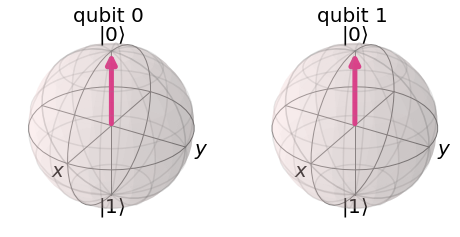

In [11]:
plot_bloch_multivector(statevector)

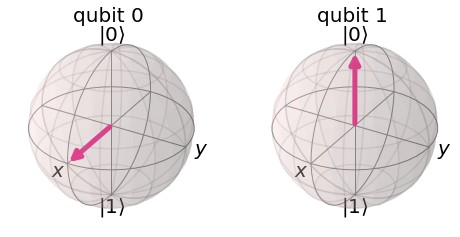

In [12]:
circuit.h(0)
statevector, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevector)

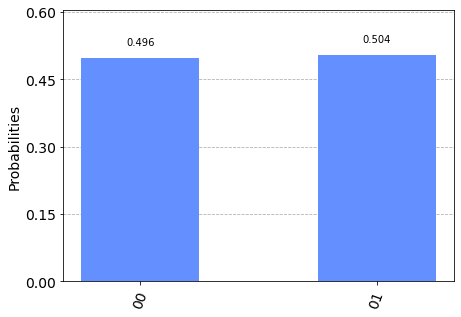

In [13]:
plot_histogram([counts])

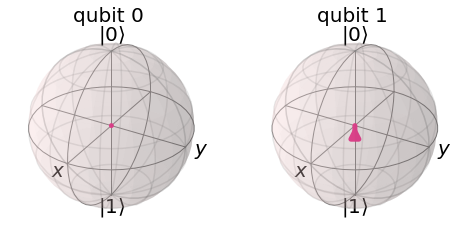

In [14]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevector, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevector)

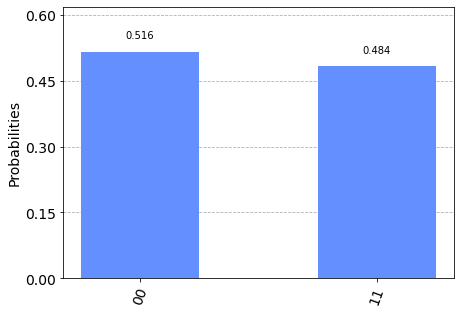

In [15]:
plot_histogram([counts])

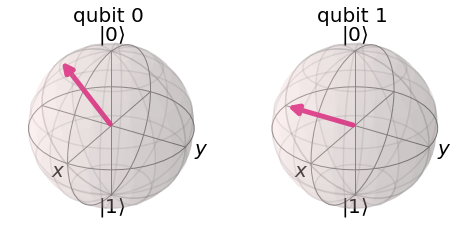

In [16]:
circuit = QuantumCircuit(2,2)
circuit.rx(math.pi/4,0)
circuit.rx(math.pi/2,1)
statevector, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevector)

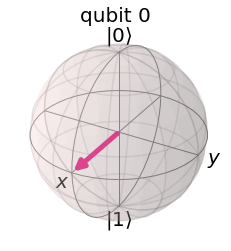

In [18]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
statevector, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevector)

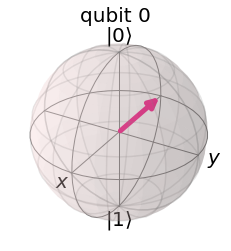

In [19]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
statevector, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevector)

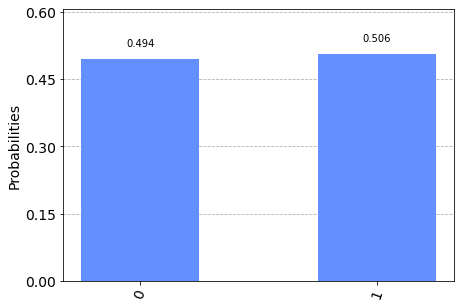

In [20]:
plot_histogram([counts])